**K-Nearest Neighbours (KNN)**

**Selfandy Fajar Kautsara Rahutama - 41155050210032**

In [1]:
import pandas as pd

sensus  = {
    'tinggi': [158, 170, 183, 191, 155, 163, 188, 158, 178],
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita',
        'wanita'
        ]

}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,188,67,wanita
7,158,54,wanita
8,178,67,wanita


**Visualisasi Data**

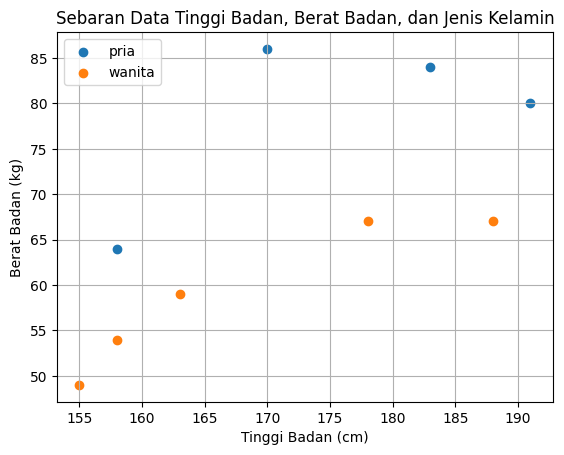

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for jk, d in sensus_df.groupby('jk'):
  ax.scatter (d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

**Processing Datasets**

In [3]:
import numpy as np

X_train = np.array (sensus_df [['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: (y_train)')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [188  67]
 [158  54]
 [178  67]]

y_train: (y_train)


In [6]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [7]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


**Training KNN Clasification Model**

In [8]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier (n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Prediksi Jenis Kelamin**

In [9]:
tinggi_badan = 155
berat_badan = 70

X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [10]:
y_new = model.predict(X_new)
y_new

array([1])

In [12]:
lb.inverse_transform(y_new)

array([1])

**Visualisasi Nearest Neighbours**

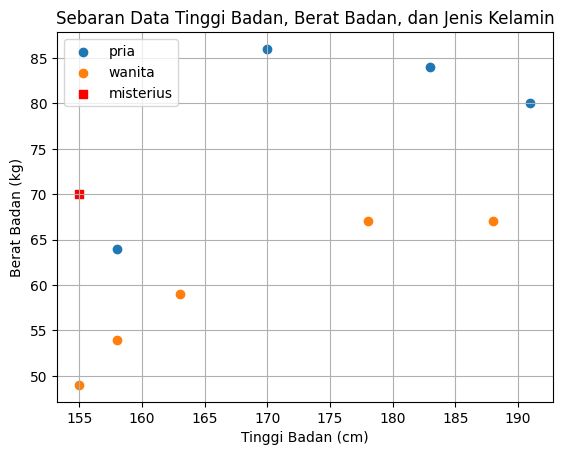

In [13]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
  ax.scatter (d['tinggi'], d['berat'], label=jk)

plt.scatter (tinggi_badan,
             berat_badan,
             marker='s',
             color='red',
             label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

**Kalkulasi Distance**

In [14]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [15]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [188,  67],
       [158,  54],
       [178,  67]])

In [16]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean (misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 33.13608305156178,
 16.278820596099706,
 23.194827009486403]

In [17]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
2,183,84,pria,31.304952
6,188,67,wanita,33.136083
3,191,80,pria,37.363083


**Evaluasi KNN Clasification Model**

Testing set

In [18]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 0 0]


Prediksi terhadapTesting set

In [19]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

**Acuracy**

In [20]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.25


**Precission**

In [21]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.0


**Recall**

In [22]:
from sklearn.metrics import recall_score

rec = recall_score (y_test, y_pred)

print(f'Recall: {rec}')

Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Scores

In [23]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

F1-score: 0.0


**Clasification report**

In [24]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         0

    accuracy                           0.25         4
   macro avg       0.50      0.12      0.20         4
weighted avg       1.00      0.25      0.40         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Mathew Corelation Coefficient (MCC)**

In [26]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef (y_test, y_pred)

print(F'MCC: {mcc}')

MCC: 0.0
